# Total Solar Irradiance Data Modeling using Kernel Methods

The total solar irradiance (TSI) is the  power integrated over all wavelengths of the electromagnetic radiation from the Sun that reaches the upper atmosphere of the Earth.  The total solar irradiance depends upon the distance of the Earth from the Sun, among other factors. It is measured in units of watts per square metre. It has several applications. It is used, for example, in the design of buildings that must be kept cool in summer and warm in winter. An even more interesting application is in climate modelling and weather forecasting, which is the application of interest herein.

The time series generated by climate phenomena are often too complex to be modelled with traditional linear methods. However, the huge amount of climate data now available suggests the use of machine learning methods to model and mine climate data (for eg. see a [recent article in Nature](http://www.nature.com/news/how-machine-learning-could-help-to-improve-climate-forecasts-1.22503)). In this project I use two sophisticated kernel based methods, support vector regression and gaussian process regression, to model and predict total solar irradiance data. This project was inspired by a blog by [Roshan](http://nbviewer.jupyter.org/github/twistedhardware/mltutorial/blob/master/notebooks/Lesson%203%20-%20Regression.ipynb).

# Kernel Methods

In a classification task a nonlinear transform, $z = \Phi(\mathbf{x')}$, taking an input from the dimensionaly small space of $\mathbf{x'}$  to a space of much larger dimension, can make a nonseperable problem into a separable one. In regression tasks the nonlinear transform to go into a higher dimensional space emerges from the basis functions used in the regression. These nonlinear basis functions allow more flexible modelling of the data. However, computing this transform, together with an inner product, in a much larger dimensional space can lead to a large increase in computational load. This load can be avoided with the so-called Kernel Trick, in which both the transform and the inner product, $K_\Phi (\mathbf{x}, \mathbf{x'}) = \Phi(\mathbf{x})^T \Phi(\mathbf{x'})$,   can be computed efficiently at a single stroke. The kernel trick is essentially the judicious selection of a transform $\Phi (\mathbf{x})$ to produce such an effect. There are several choices for kernel but a popular kernel whose z-space is in fact infinite dimensional is the Radial Basis kernel, $ K(\mathbf{x}, \mathbf{x'}) = \exp( - \gamma  \| \mathbf{x} - \mathbf{x'} \|). $ The $\gamma$ parameter controls the width of the RBF and hence the model complexity. If $\gamma$ is large, and the model therefore complex, the RBF can fit highly complex decision boundaries in the orignal feature space in classifiations task or complicated functions in regressions task. Without care, however, this modeling ability of RBFs can lead to overfitting.

From the kernel we form the gram matrix $K$. Mercer's theorem gives the condition that must be satsifed for a kernel to be a valid one. $K(\mathbf{x}, \mathbf{x'})$ the kernel matrix formed from it must be positive definate for any given $\{ \mathbf{x}_!, \ldots \mathbf{x}_N \}$

\begin{equation}K = \begin{bmatrix}
 k(x_{1}, x_{1}) &  k(x_{1}, x_{2}) & \ldots & k(x_{1}, x_{3}) \\
 k(x_{2}, x_{1}) &  k(x_{2}, x_{2}) & \ldots  & k(x_{2}, x_{3}) \\
 \vdots  & \vdots  &&  \vdots  \\
 k(x_{3}, x_{1}) & k(x_{3}, x_{2})  & \ldots & k(x_{3}, x_{3})
\end{bmatrix}
\end{equation}

There are two main kernel based methods in machine learning, support vector machines and Gaussian processes. I briefly describe the theory behind the regression version of SVMs and of Gaussian process regression. See reference [4] for more details.

## Gaussian Process Regression

Gaussian processes are distributions over infinite dimensional functions. A key property of these functions is that any finite subset of their range obeys a multivariate Gaussian distribution. This  property enables inferences to be made about these infinite dimensional functions with finite amounts of data. The key property in a Gaussian processs regression is the kernel function which desribes the correlation behaviour of the process. There are several kernel functions all with different properties. Combinations of kernel functions can be formed and are chosen to match the dataset being modelled.

Give observations $y$ consisting of an underlying function $f(x)$ contaminated with additive Gaussian noise, $\mathcal{N}$, our regression model has the form:

\begin{equation}
y = f(x) + \mathcal{N} (0, \sigma_{n}^{2})
\end{equation}

Assuming we have sampled data $\mathbf{y}_N$ at points $\mathbf{x}_1, \ldots, \mathbf{x}_n$. Then assuming a covariance function of the process $k(x,x')$, we can form a covariance matrix of our observations. $K$:

\begin{equation} K = \begin{bmatrix}
 k(x_{1}, x_{1}) &  k(x_{1}, x_{2}) & \ldots & k(x_{1}, x_{3}) \\
 k(x_{2}, x_{1}) &  k(x_{2}, x_{2}) & \ldots  & k(x_{2}, x_{3}) \\
 \vdots  & \vdots  &&  \vdots  \\
 k(x_{3}, x_{1}) & k(x_{3}, x_{2})  & \ldots & k(x_{3}, x_{3})
\end{bmatrix}
\end{equation}

There are many possible choices of covariance function and one must be selected to model the covariance structure of the data being analyzed. An example is one composed of the sum of an exponential  and a kroneker delta function:

\begin{equation}
k(x,x') =  \sigma_{f}^{2} \exp \bigg[  \frac{-(x-x')^2}{2 l^2} \bigg] + \sigma_{n}^{2} \delta(x,x')
\end{equation}

The exponentioal function models signals strongly correlated at points very close to one another but with rapidly declining correlation at points further away while the kroncker delta function models additive Gaussian white noise. I will describe more kernel functions later. Now, assume we want to predict the value $y_*$ at a point $x_*$. Defining the quantities $K_{**}$ and $K_*$ as follows:

\begin{equation}
K_{**} = k(x_{*}, x_{*}) \end{equation} and  \begin{equation} K_{*} = [k(x_{*}, x_{1}), k(x_{*}, x_{2}) \ldots k(x_{*} x_{n}) ]
\end{equation}

And using the properties of multivariate Gaussians:

\begin{equation}
\begin{pmatrix} \mathbf{y} \\ y_{*} \end{pmatrix} \sim \mathcal{N} \bigg( \mathbf{0}, \begin{bmatrix} K & K_{*}^{T} \\ K_{*} & K_{**} \end{bmatrix} \bigg)
\end{equation}

After some algebra it can be shown that the value $y_*$ of the process at $x_*$ given the observations $\mathbf{y}$ at $\mathbf{x}$ is given by:

\begin{equation}
y* \mid \mathbf{y}  \sim \mathcal{N}  (K_{*}K^{-1} \mathbf{y}, K_{**} - K_{*}K_{1}K_{*}^{T}
\end{equation}


As our prediction we take the mean of this distribution $ \bar{y}_{*}$: 

\begin{equation} \bar{y}_{*} = K_{*} K^{-1} \mathbf{y}\end{equation}  

And the variance or error of the prediction is given by:

  \begin{equation} \text{var} = ( K_{**} - K_{*}K^{-1} K_{*}^{T}) \end{equation}

The fact that Gaussian process regression also provides the uncertainty associated a the prediciton is a very useful feature an  and advantage over support vector regression.

### Determing parameters

We will need to estimate a set of parameters, for example $\theta = \{l, \sigma_n, \mu_n \}$. In practice this is done by selecting the $\theta$ that maximizes the data log likelihood:

\begin{equation}
\mathcal{L} (\theta) = p (\mathbf{y} \mid \mathbf{x}, \mathbf{\theta} ) = \frac{1}{2} \det K - \frac{1}{2} t^{T} K^{-1} t - \frac{n}{2} \log 2 \pi
\end{equation}

The gradient of the log likelihood can be show to be:

\begin{equation}
\frac{\mathcal{L} ( \mathbf{\theta} )}{\partial \theta_{i}} = -\frac{1}{2} \text{tr} \bigg( K^{-1} \frac{\partial K }{\partial \theta_{i}} \bigg) + \frac{1}{2} t^{T} K^{-1} \frac{\partial K}{ \partial \theta_{i}} K^{-1} t
\end{equation}

Using this a gradient based optimization procedure can be used to obtain the optimal $\theta$. There are in theory local minima which can trap gradient based methods but in practice it has been found that restarting the optimization procedure with different initial conditions avoids local minima. 

## Support Vector Regression

Support Vector Regression (SVR) is a nonlinear regression technique based on concepts from the Support Vector Machine (SVM) classification method. Given a function $y(x)$ with additive Gaussian noise $ \mathcal{N} $ to model and with training data $(x_n, t_n)$ our goal is to model the underlying function with a regression function that has a maximum deviation $\epsilon$ from our data while at the same time being as flat as possible. ie. $ y_n - \epsilon < t_n < y_n + \epsilon$ where $y_n = y(\mathbf{x}_n)$. The $\epsilon$ parameter describes a tube that snakes around the data points within they must be confined. However, this condition may prove too stringent to satisfy in practice.Therefore we relax it by introducing so-called slack variables $\xi_n$ and $ \hat{\xi}_n$. This relaxation allows target points to lie outside the tube which expressed mathematically is:

\begin{equation} t_n \leq y (x_n) + \epsilon + \xi_n \end{equation}

\begin{equation} t_n \geq y (x_n) - \epsilon - \hat{\xi}_n \end{equation}

The  net result of this is to introduce an effective $\epsilon$-loss function defined by:

\begin{equation} E_e(y(\mathbf{x}) -t ) = \left \{ \begin{array}{ll}  0 &    | y(\mathbf{x})-t| < \epsilon  \\
 | y(\mathbf{x})-t| - \epsilon & \text{otherwise} \end{array}  \right. \end{equation}

The error functon for the SVR before the introduction of slack variables can be written:

\begin{equation}
C \sum_{n=1}^{N} \{ y_n - t_n \}^2 + \frac{1}{2} \| \mathbf{w} \|^2
\end{equation}

Where $C$ is a regularization parameter. After the introduction of the slack variables the error function for support vector regression is written as:

\begin{equation}
C \sum_{n=1}^{N} \{ \xi_{n} - \hat{ \xi}_{n} \}^2 + \frac{1}{2} \| \mathbf{w} \|^2
\end{equation}

This function is minimised subject to the conditions $\xi_n \geq 0 $ and $\hat{\xi}_n  \geq 0 $ as well as condtions above. This minimization using the method of Lagrange mulipliers results in the following Lagrangian:

\begin{equation}
L = C \sum_{n=1}^{N} (\xi_n + \mathbf{\xi}_n) + \frac{1}{2} \| \mathbf{w} \| - \sum_{n=1}^{N} ( \mu_n \xi_n + \hat{\mu_n}\hat{\xi}_n) -   \sum_{n=1}^N  a_n( \epsilon + \xi_n + y_n  - t_n )  - \sum_{n=1}^N \hat{a}_n( \epsilon + \xi_n  - y_n + t_n )
\end{equation}

where $a_n$, $\hat{a}_n$, $ \mu_n $ and $ \hat{\mu}_n$  are the Lagrange multipliers. For the SVM the analysis is often easier and more insightful if we consider the problem in the dual space, where the Lagrangian is minimized with respect to the multipliers $a_n$ and $\hat{a}_n$ and has the form:

\begin{equation}   
\tilde{L}(\mathbf{a},\hat{\mathbf{a}}) = - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N (a_n - \hat{a}_n )(a_m - \hat{a}_m ) k( \mathbf{x}_n,\mathbf{x}_m ) - \epsilon \sum_{n=1}^N  (a_n + \hat{a}_n) + \sum_{n=1}^N (a_n - \hat{a}_n) t_n
\end{equation}

Where the kernel $k( \mathbf{x}_n,\mathbf{x}_m ) = \boldsymbol{\phi}(\mathbf{x})^T  \boldsymbol{\phi}(\mathbf{x}) $. The dual space formulation gives us a result in terms of our input data and the kernel function. As well as a potential decrease in computional load (with a judicious choice of kernel) we also gain insight into the solution, such as the roles of the support vectors. From the derivation are obtained the so-called Box contraints:

\begin{equation} 0 < a_n < C \end{equation} and \begin{equation} 0 < \hat{a}_n < C \end{equation} 

A predicion for a new data point $\mathbf{x}$ is given in terms of the kernel function by;

\begin{equation} y(\mathbf{x}) = \sum_{n=1}^{N} (a_n - \hat{a}_n) k(\mathbf{x}, \mathbf{x}_n ) + b \end{equation}

Where a procedure exists such that the parameter $b$ can be estimated from the data.

There are also associated conditions called the Kahn-Tucker conditions from which some very useful insights can be gained. Only data points lying on or outside the $\epsilon$-tube, the support vectors, contribute in the above sum. Those inside contribute nothing. This gives us a sparse solution and avoids some of the computational load problems of Gaussain processes. A nice property of SVR methods is that the determination of the parameters is formulated as a convex optimization problem.

# Data Analysis

I first import the python modules I will need.

In [2981]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from time import time

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared, Matern
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV

import random
random.seed( 3 )

plt.style.use('seaborn-white')
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("poster")

The data is loaded into a pandas data frame and the first and last few entries are printed.

In [2982]:
dataDF = pd.read_csv("c:/users/jamil/temproj/temp_data_features2.csv")
dataDF.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average,TSI,CO2,CH4,Unnamed: 17
0,1851,0.823,0.357,-0.564,0.510,0.062,0.062,0.367,0.279,0.172,0.672,-0.132,-0.240,0.197333,1360.8289,NaN,NaN,NaN
1,1852,0.132,0.185,-0.016,-0.889,0.427,0.485,0.539,0.064,0.147,-0.252,0.126,1.834,0.231833,1360.8634,NaN,NaN,NaN
2,1853,0.711,-0.656,-1.348,-0.478,-0.213,-0.196,0.418,0.325,-0.333,0.082,-0.527,-1.230,-0.287083,1360.7908,NaN,NaN,NaN
3,1854,-0.444,0.256,0.200,-0.355,0.428,0.107,0.616,0.399,0.171,0.702,-0.501,0.346,0.160417,1360.6420,NaN,NaN,NaN
4,1855,0.059,-1.359,-0.521,0.444,0.243,0.197,0.277,0.127,-0.303,0.346,-0.431,-1.622,-0.211917,1360.5151,NaN,NaN,NaN


In [2983]:
dataDF.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average,TSI,CO2,CH4,Unnamed: 17
159,2010,0.778,0.826,1.111,1.062,0.936,0.996,0.974,0.863,0.732,0.888,1.195,0.448,0.900750,1360.7969,389.85,1896.487500,NaN
160,2011,0.467,0.382,0.585,0.830,0.523,0.778,0.775,0.766,0.852,0.941,0.609,0.827,0.694583,1361.0680,391.63,1896.034167,NaN
161,2012,0.557,0.323,0.645,1.030,0.963,0.947,0.792,0.891,0.900,0.847,0.849,0.261,0.750417,1361.2332,393.82,1899.780000,NaN
162,2013,0.935,0.949,0.669,0.581,0.773,0.827,0.671,0.706,0.776,0.821,0.984,0.795,0.790583,1361.2924,396.48,1906.750000,NaN
163,2014,0.950,0.408,0.929,1.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833750,NaN,NaN,NaN,NaN


Plotting the TSI time series we observe it has a complicated structure but a seemingly low noise level. It approximately has the structure of a higher frequency sine wave modulated by a lower frequency one, though the amplitide of the higher frequency osscilations is varying with time and there is some irregularity present too.

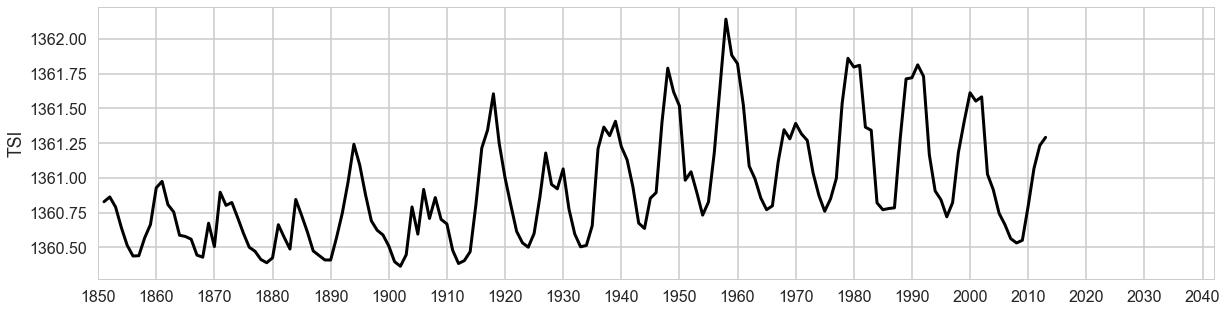

In [2984]:
forecast_window = 30

yearIndex = np.arange(np.min(dataDF[["Year","TSI"]].dropna()["Year"]),
                                 np.max(dataDF[["Year","TSI"]].dropna()["Year"])+forecast_window)
yearIndex = [[item] for item in yearIndex]

#prediction_annual_index = [[item] for item in range(min(yearIndex),max(yearIndex)+ forecast_window)]



plt.figure(figsize=(20,5))
plt.plot(dataDF["Year"], dataDF["TSI"], linewidth=3, c="black", alpha=1.0)
plt.ylabel("TSI")
plt.xlim(np.min(yearIndex)+1, np.max(yearIndex))
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))

plt.show()

## Support Vector Regression

Recall that the $\epsilon$ parameter controls the width of the tube within which the data is pefered to lie while the $\gamma$ parameter controls the width of the radial basis function used in the SVR. In order to model the low frequency structure in our data we need a fairly large value for $\epsilon$ in order to give the regression curve the flexbility to pass far from our data points and a small value for $\gamma$ in order to prevent the model tracking the higher frequency oscillations and to track the low frequency component instead. In order to track the high frequency oscillations the situation is the reverse: a small value of $\epsilon$ to constrain the regression curve to pass near the data points and a large value of $\gamma$ to give a narrow radial basis function for a more complex model that can capture the behaviour of both the low and high frequency components in the signal. Recall that $C$ is the regularization parameter of the error function minimization.

### SVR Data Analysis

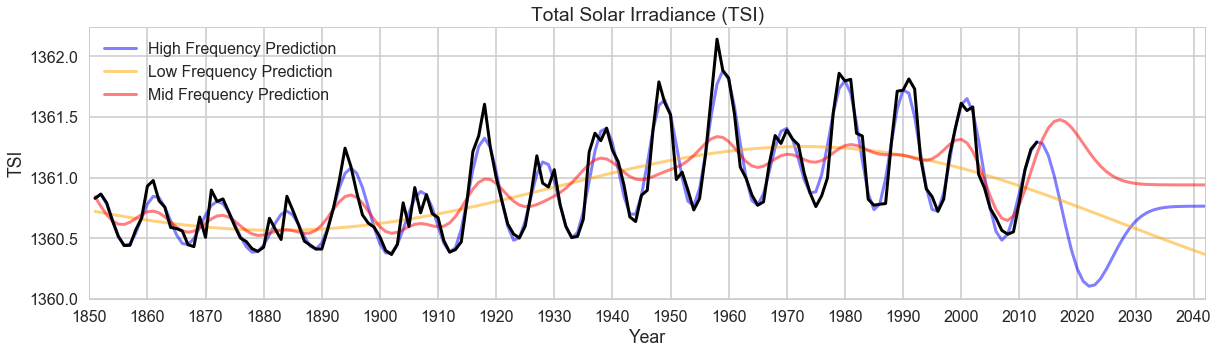

In [2985]:
high_freq = SVR(kernel="rbf", C=100.0, gamma=0.015, epsilon=0.001)
#high_freq = SVR(kernel="rbf", C=20.0, gamma=0.35, epsilon=0.01) # perfect score of 1!
low_freq = SVR(kernel="rbf", C=10.0, gamma=0.0001, epsilon=0.01)
mid_freq = SVR(kernel="rbf", C=1.0, gamma=0.015, epsilon=0.1)


# Train the model using the training sets
high_freq.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"])
low_freq.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"])
mid_freq.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"])

# Plot outputs
plt.figure(figsize=(20,5))
plt.plot(yearIndex[:], high_freq.predict(yearIndex[:]), color='blue',
      linewidth=3, alpha=0.5, label="High Frequency Prediction")
plt.plot(yearIndex[:], low_freq.predict(yearIndex[:]), color='orange',
        linewidth=3, alpha=0.5, label="Low Frequency Prediction")
plt.plot(yearIndex[:], mid_freq.predict(yearIndex[:]), color='red',
        linewidth=3, alpha=0.5, label="Mid Frequency Prediction")
plt.xlim(np.min(yearIndex), np.max(yearIndex))
plt.xticks(np.arange(np.min(yearIndex), np.max(yearIndex), 10))
plt.ylabel(u"Total Solar Iradiance")
plt.xlabel('Year')
plt.title("Total Solar Irradiance (TSI)")
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))
plt.legend(loc="best")
plt.plot(dataDF["Year"], dataDF["TSI"], linewidth=3, c="black", alpha=1.0)
plt.ylabel(u"TSI")
plt.show()

We see that the high frequency model seems to fit the data well. However, in order to quantify the fit of the three models we compute the score metric for each fit. A score = 1 corresponds to a perfect fit.

In [3000]:
# The coefficients
#print( 'Coefficients:', regr.coef_)
# The mean square error
#print("Residual sum of squares: %.2f"
# Explained variance score: 1 is perfect prediction
print('High Freq score: %.2f' % high_freq.score(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"]))
print('Low Freq score: %.2f' % low_freq.score(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"]))
print('Mid Freq score: %.2f' % mid_freq.score(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"]))

High Freq score: 0.93
Low Freq score: 0.38
Mid Freq score: 0.55


The fit seems good, however, this heuristic approach to model fitting isn't satisfactory and we need a more systematic and thorough exploration of the parameter space. To this end we conduct a grid search for both the high frequency and low frequency model. A grid search is an exhastive search for the optimal parameters over a specified parameter range.

In [2987]:
radial_basis_reg = SVR(kernel="rbf") 
C = [5, 10, 20, 30, 40, 50, 100]
gamma_HighFreq = [0.5, 0.4, 0.35, 0.3, 0.25, 0.1, 0.025, 0.02, 0.015, 0.01]
gamma_LowFreq = [0.005, 0.004, 0.003, 0.002, 0.001, 0.0009, 0.0008, 0.0007, 0.0006, 0.0005, 0.0004, 0.0003, 0.0002, 0.0001]
epsilon=[0.1, 0.01, 0.001]
parameters_HighFreq = {"C":C, "gamma":gamma_HighFreq, "epsilon":epsilon}
parameters_LowFreq = {"C":C, "gamma":gamma_LowFreq, "epsilon":epsilon}

high_freq_grid = GridSearchCV(radial_basis_reg, parameters_HighFreq, scoring="r2", verbose = True)
low_freq_grid  = GridSearchCV(radial_basis_reg, parameters_LowFreq, scoring="r2", verbose = True)

high_freq_grid.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"])
low_freq_grid.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"])



Fitting 3 folds for each of 210 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    8.8s finished


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    3.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [5, 10, 20, 30, 40, 50, 100], 'gamma': [0.005, 0.004, 0.003, 0.002, 0.001, 0.0009, 0.0008, 0.0007, 0.0006, 0.0005, 0.0004, 0.0003, 0.0002, 0.0001], 'epsilon': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=True)

Printing the optimal parameters for both the low and high frequency models:

In [2988]:
print ("Best High Frequency Estimator:\n%s"  % high_freq_grid.best_estimator_)
print ("Best Low Frequency Estimator:\n%s"  % low_freq_grid.best_estimator_)

Best High Frequency Estimator:
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.02,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Best Low Frequency Estimator:
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


We observe that in both domains the grid search's best fitting parameters are different to the heuristic ones. 

In [2989]:
print('score for high freq model: %.2f' % high_freq_grid.score(csv_data[["Year","TSI"]].dropna()[["Year"]], csv_data[["Year","TSI"]].dropna()["TSI"]))
print('score for low freq model: %.2f' % low_freq_grid.score(csv_data[["Year","TSI"]].dropna()[["Year"]], csv_data[["Year","TSI"]].dropna()["TSI"]))

score for high freq model: 0.93
score for low freq model: 0.38


C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


The scores of the grid search parameters are slightly higher than those found heurstically. Plotting the optimal regression curve obtained by the grid search:

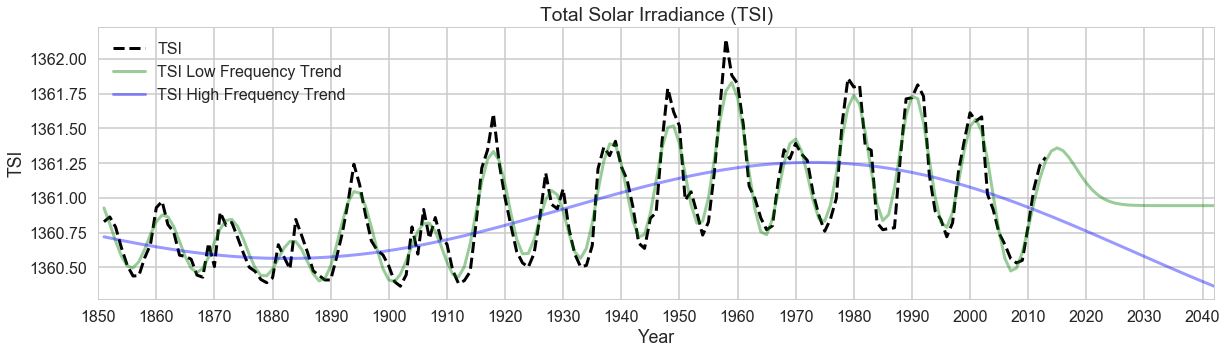

In [2990]:
plt.figure(figsize=(20,5))
plt.plot(dataDF["Year"], dataDF["TSI"], "--", linewidth=3, c="black", label="TSI")
plt.plot(yearIndex,
            high_freq_grid.best_estimator_.predict(yearIndex),
            linewidth=3, c="green", label="TSI Low Frequency Trend", alpha=0.4)
plt.plot(yearIndex,
            low_freq_grid.best_estimator_.predict(yearIndex),
            linewidth=3, c="blue", label="TSI High Frequency Trend", alpha=0.4)
plt.ylabel(u"TSI")
plt.xlabel('Year')
plt.legend(loc="upper left")
plt.xlim(np.min(yearIndex)-1, np.max(yearIndex))
plt.title("Total Solar Irradiance (TSI)")
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))
#plt.grid()
plt.show()

Observe that the forecasts of the model found using a grid search (green curve) and a heuristic search (blue curve) are quite different. Grid searches can be computationaly expensive so I try a randomized search of the same parameter space. It will be interesting to compare both sets of results.

In [2991]:
parameters_HighFreq = {"C":C, "gamma":gamma_HighFreq, "epsilon":epsilon}
parameters_LowFreq = {"C":C, "gamma":gamma_LowFreq, "epsilon":epsilon}

high_freq_rand = RandomizedSearchCV(radial_basis_reg, parameters_HighFreq, n_iter=2, scoring="r2", verbose = True)
low_freq_rand = RandomizedSearchCV(radial_basis_reg, parameters_LowFreq, n_iter=2, scoring="r2", verbose = True)

high_freq_rand.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"])
low_freq_rand.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"])

print ("Best High Frequency Estimator:\n%s"  % high_freq_rand.best_estimator_)
print ("Best Low Frequency Estimator:\n%s"  % low_freq_rand.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best High Frequency Estimator:
SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.4,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Best Low Frequency Estimator:
SVR(C=30, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0009,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


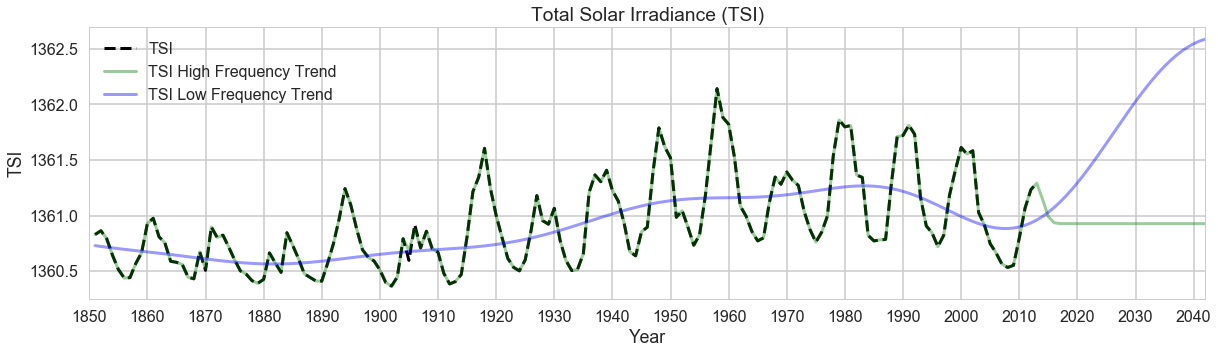

score for high freq model: 1.00
score for low freq model: 0.38


In [3001]:
plt.figure(figsize=(20,5))
plt.plot(dataDF["Year"], dataDF["TSI"], "--", linewidth=3, c="black", label="TSI")
plt.plot(yearIndex,
            high_freq_rand.best_estimator_.predict(yearIndex),
            linewidth=3, c="green", label="TSI High Frequency Trend", alpha=0.4)
plt.plot(yearIndex,
            low_freq_rand.best_estimator_.predict(yearIndex),
            linewidth=3, c="blue", label="TSI Low Frequency Trend", alpha=0.4)
plt.ylabel(u"TSI")
plt.xlabel('Year')

plt.legend(loc="upper left")

plt.xlim(np.min(yearIndex)-1, np.max(yearIndex))
plt.title("Total Solar Irradiance (TSI)")
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))
#plt.grid()
plt.show()

print('score for high freq model: %.2f' % high_freq_rand.score(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"]))
print('score for low freq model: %.2f' % low_freq_rand.score(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()["TSI"]))

Interestingly I found that for the high frequency model multiple random searches exhibit a high variance in the scores with the minimum being just over 0.93 and the maximum a perfect score of 1. The behaviour of both low and high frequency models can vary erraticaly. The model for the low frequency component found by randomized search is quite poor. It's baffling that the grid search isn't finding the parameters that have higher scores than the solution it finds. This needs looking into. 

# Gaussian Process Regression

I now apply Gaussian process regression to the same TSI dataset. First, however, I describe the kernel functions I'll be using and some of their properties.

## Kernel Functions

Kernel functions are an essential part of Gaussian process regression. There are several widely used kernel functions and each encodes a different assumption about the correlation structure of the time series being modelled.  Moreover, from a Bayesian perspective kernel functions determine both the prior and the posterior.  Kernel functions can also be combined with each other to encode more sophisticated correlation structures. For instance a new kernel can be generated by the sum or the product of two kernels. In this way a kernel function can be engineered by the data analyst for a particular time series. When carrying out Gaussian process regression the kernel has at least two parameters that must be determined from the data -it's amplitude $\sigma$ and its length scale $l$.  We now describe several kernels and the information about the correlation structure they encode.

### Matern Kernel

\begin{equation}
k(x_i, x_j) = \sigma^2 \frac{1}{\Gamma(\nu)2^{\nu-1}}  \bigg ( \gamma \surd{2} \nu  d(x_i/l, x_j/l) \bigg )  K_{\nu}  \bigg ( \gamma \surd{2} \nu d(x_i/l, x_j/l)      \bigg )
\end{equation}

$\text{where}$ $\Gamma(\nu) $ is the gamma function and $K_{\nu} $ is a Bessel function. The Matern kernel is a stationary kernel which has an additional parameter $\nu$ that controls the smoothness of the regression function. The Matern kernel contains other kernels as special cases and is therefore an expressive kernel.

### Rational Quadratic Kernel

\begin{equation}
k(x_i, x_j) = \big ( 1 + \frac{d(x_i, x_j)^2}{2 \alpha l^2}  \big )^{- \alpha}
\end{equation}

This kernel is a mixture of an infinite number of radial basis kernels where the $\alpha$ parameter controls the mixture.

### Exp-Squared Sine Kernel

\begin{equation}
k(x_i, x_j) = \exp \big ( 2(\sin( \frac{\pi}{p} d(x_i,x_j)/  l))^2   \big ) 
\end{equation}

This kernel is a good model for periodic functions, where the addtional parameter $p$ is the periodicity parameter.

### Radial basis kernel

\begin{equation}
k(x_i, x_j) = \exp \big (- \frac{1}{2} d(x_i/l,x_j/l )^2 \big )
\end{equation}

The radial basis kernel is a stationary kernel that is a good model for smooth functions. As we shall we later it can also model periodic functions.

### White kernel

\begin{equation}
k(x_i, x_j) = \delta(x_i,x_j)
\end{equation}

The White kernel models white noise.

### GPR Data Analysis

I will explore various choices of kernels and how they affect modelling ability. The following are the six kernel functions I will use to build the kernels used in the analyses:

In [2993]:
k1 =  RBF()  # Radial basis functio for long term smooth trends
k2 =  RBF() * ExpSineSquared(periodicity_bounds="fixed")  # seasonal component

# medium term irregularities
k3 = RationalQuadratic()
k4 = RBF() + WhiteKernel(noise_level_bounds=(1e-3, np.inf))  # noise terms

k5 =  Matern( length_scale_bounds=(1e-05, 100000.0), nu=1.5)

# uncorrelated white noise
k6=WhiteKernel(noise_level_bounds=(1e-3, np.inf))

Initially I want to try to capture the low frequency component of the time series. To do this I generate a kernel made up of the RBF kernel to capture the smooth low frequency signal plus the the white kernel to model a random noise component. I give both components initial heuristically selected amplitudes.

GPML kernel: 0.249**2 * RBF(length_scale=41.7) + 0.915**2 * WhiteKernel(noise_level=0.122)
Log-marginal-likelihood: -51.744


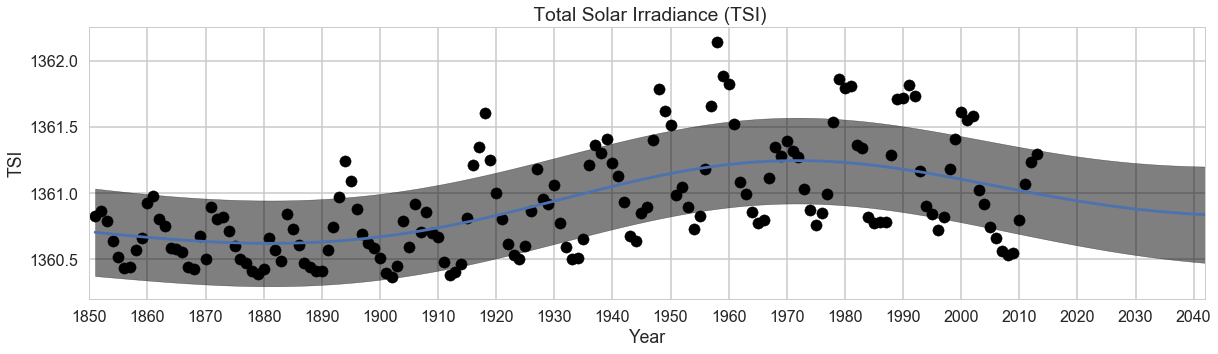

In [2994]:
kernel =   20**2*k1 + 10*k6

# k5 + k6 captures the short term osscilation beatifully but the prediction is very poor
# k1 + k6  capture the long term ossoclations well and prediction makes sense
# k1 + k3 captures shortm osscialtion well but again predictio poor - later note - it's fitting the noise!
gp = GaussianProcessRegressor(kernel=kernel, alpha=0, optimizer = 'fmin_l_bfgs_b',
                              normalize_y=True)

gp.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]]   )

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

y_pred, y_std = gp.predict(np.array(yearIndex), return_std=True)

y_pred = y_pred[:,0]

plt.figure(figsize=(20,5))
plt.scatter(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]], c='k')
plt.plot(yearIndex, y_pred)
plt.fill_between(np.array(yearIndex)[:,0], y_pred - y_std, y_pred + y_std,  alpha=0.5, color='k')
plt.xlim(np.min(yearIndex)-1, np.max(yearIndex))
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))

#plt.grid()
plt.xlabel("Year")
plt.ylabel(r"TSI")
plt.title(r" Total Solar Irradiance (TSI)")
plt.tight_layout
plt.show()

This attempt as been quite succesful. The kernel parameters show that the signal contains a relatively low amplitude RBF component with a large length scale of 41.7 years and a large amplitude white noise component. The log marginal likelihood is low since this is not a good model for the data. Very interestingly if I force the RBF amplitude to one (by specifying kernel = k1 + 10k6) the kernel models the full signal very well with an RBF of length scale of 3.99 and log marginal likelihood of 36.291. The RBF can model high frequency periodic components too.

GPML kernel: RBF(length_scale=3.99) + 0.316**2 * WhiteKernel(noise_level=0.102)
Log-marginal-likelihood: 36.291


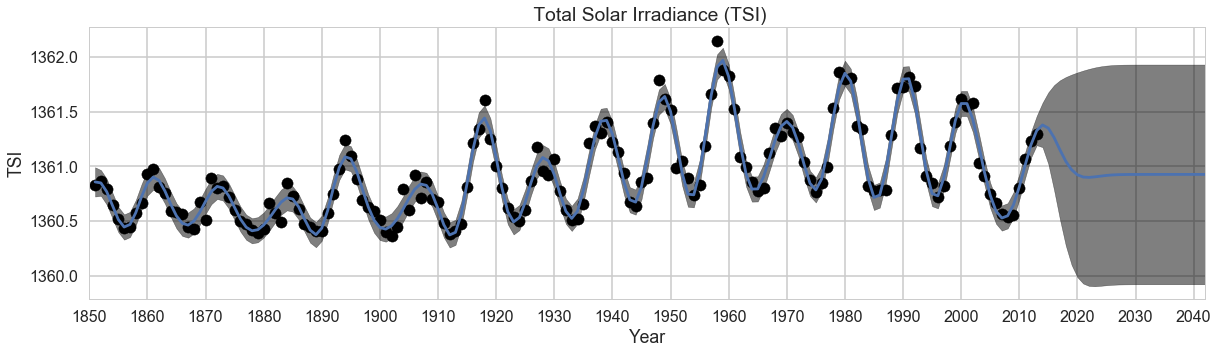

In [2995]:
kernel = k1 + 10*k6

# k5 + k6 captures the short term osscilation beatifully but the prediction is very poor
# k1 + k6  capture the long term ossoclations well and prediction makes sense
# k1 + k3 captures shortm osscialtion well but again predictio poor - later note - it's fitting the noise!
gp = GaussianProcessRegressor(kernel=kernel, alpha=0, optimizer = 'fmin_l_bfgs_b',
                              normalize_y=True)

gp.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]]   )

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

y_pred, y_std = gp.predict(np.array(yearIndex), return_std=True)

y_pred = y_pred[:,0]

plt.figure(figsize=(20,5))
plt.scatter(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]], c='k')
plt.plot(yearIndex, y_pred)
plt.fill_between(np.array(yearIndex)[:,0], y_pred - y_std, y_pred + y_std,  alpha=0.5, color='k')
plt.xlim(np.min(yearIndex)-1, np.max(yearIndex))
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))

#plt.grid()
plt.xlabel("Year")
plt.ylabel(r"TSI")
plt.title(r" Total Solar Irradiance (TSI)")
plt.tight_layout
plt.show()

This is a surprizing result. A single RBF has captured both the high and low frequency behaviour of the signal and the forecast is consistent with the SVR forecast, though the uncertainty seems quite large.

In order to model the full curve I use as complex a model as possible in the hope that the method can find the optimal parameters and indeed the log marginal likelihood  of 50.771 thereby attained is the highest I've found after a lot of experimentation.

GPML kernel: 0.00316**2 * RBF(length_scale=3.18e+03) + 0.21**2 * RBF(length_scale=42.2) * ExpSineSquared(length_scale=1, periodicity=1) + 0.0297**2 * RationalQuadratic(alpha=1e+05, length_scale=2.44) + 0.363**2 * RBF(length_scale=2.44) + WhiteKernel(noise_level=0.00127) + 0.00316**2 * Matern(length_scale=0.151, nu=1.5) + 0.135**2 * WhiteKernel(noise_level=0.455)
Log-marginal-likelihood: 50.771


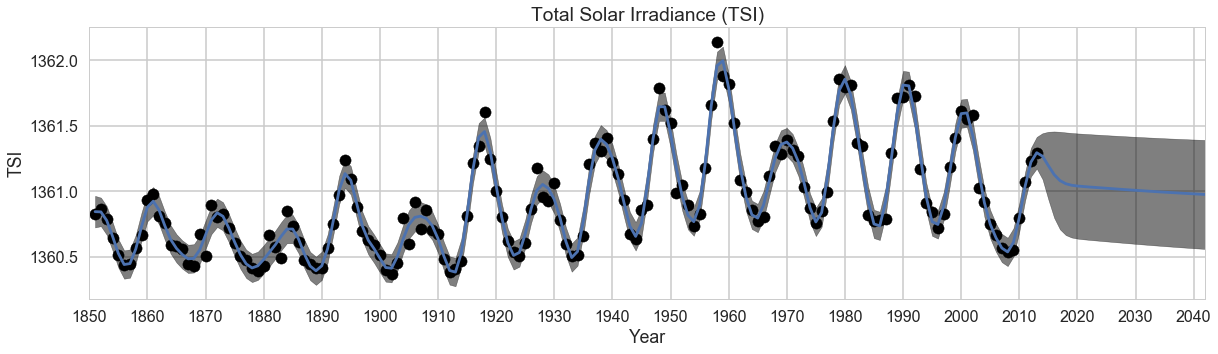

In [2996]:
kernel =  60**2* k1 + 2**2*k2 + 0.66**2*k3 + 0.18**2*k4+ 0.18**2*k5 + 0.2**2*k6

#kernel = 10**2*k1 + 10*k4
gp = GaussianProcessRegressor(kernel=kernel, alpha=0, optimizer = 'fmin_l_bfgs_b',
                              normalize_y=True)

gp.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]]   )

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

y_pred, y_std = gp.predict(np.array(yearIndex), return_std=True)

y_pred = y_pred[:,0]

plt.figure(figsize=(20,5))
plt.scatter(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]], c='k')
plt.plot(yearIndex, y_pred)
plt.fill_between(np.array(yearIndex)[:,0], y_pred - y_std, y_pred + y_std,  alpha=0.5, color='k')
plt.xlim(np.min(yearIndex)-1, np.max(yearIndex))
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))


#plt.grid()
plt.xlabel("Year")
plt.ylabel(r"TSI")
plt.title(r"Total Solar Irradiance (TSI)")
plt.tight_layout
plt.show()

Both the interpolation and the extrapolation of the model seem good. The forecast is consistent with the SVR forecast and the uncertainty is relatively small. However when using a much simpler kernel the result is most surprizing:

GPML kernel: 0.21**2 * RBF(length_scale=42.2) + 0.364**2 * RBF(length_scale=2.44) + WhiteKernel(noise_level=0.0636)
Log-marginal-likelihood: 50.771


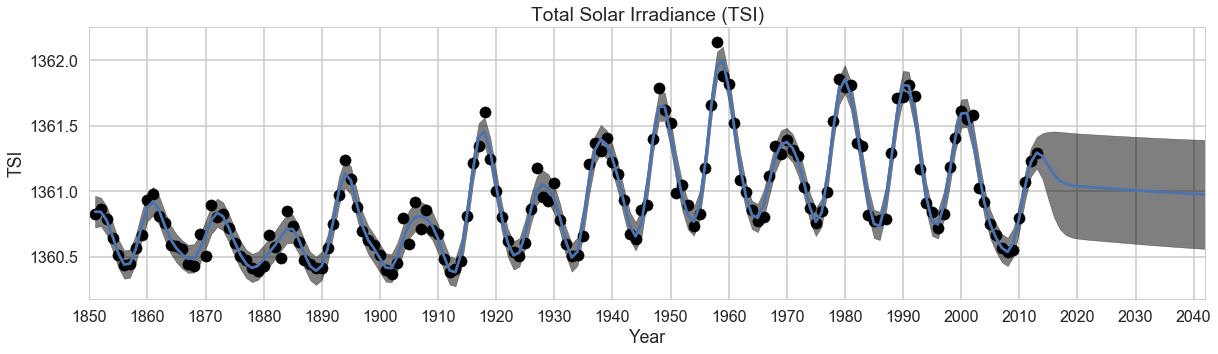

In [2997]:

kernel = 10**2*k1 + 10*k4
gp = GaussianProcessRegressor(kernel=kernel, alpha=0, optimizer = 'fmin_l_bfgs_b',
                              normalize_y=True)

gp.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]]   )

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

y_pred, y_std = gp.predict(np.array(yearIndex), return_std=True)
y_pred = y_pred[:,0]

plt.figure(figsize=(20,5))
plt.scatter(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]], c='k')
plt.plot(yearIndex, y_pred)
plt.fill_between(np.array(yearIndex)[:,0], y_pred - y_std, y_pred + y_std,  alpha=0.5, color='k')
plt.xlim(np.min(yearIndex)-1, np.max(yearIndex))
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))

#plt.grid()
plt.xlabel("Year")
plt.ylabel(r"TSI")
plt.title(r"Total Solar Irradiance (TSI)")
plt.tight_layout
plt.show()

This model is the same as the model used earlier except that one more RBF kernel has been added. Very surprizingly I obtain the same solution as with the very complex kernel! Inspection of the model parameters reveals that the RBF k1 component models the low frequency component of the signal at length scale 42.3 while the RBF component of k4 models the high frequency component at a length scale of 2.44. Together with a white noise kernel the fit and the forecast are excellent.

I try the following kernel as an experiment:

GPML kernel: 0.00586**2 * RBF(length_scale=1e+05) + WhiteKernel(noise_level=0.00239) + RationalQuadratic(alpha=0.225, length_scale=5.69) + RBF(length_scale=1e+05) * ExpSineSquared(length_scale=1, periodicity=1) + WhiteKernel(noise_level=0.00797)
Log-marginal-likelihood: 36.617


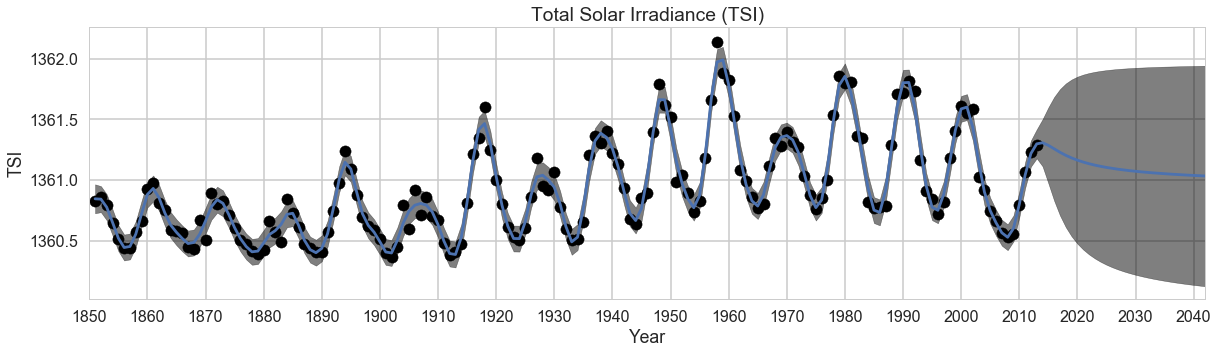

In [2998]:
kernel =  10*k4 + k3 +k2 + k6
gp = GaussianProcessRegressor(kernel=kernel, alpha=0, optimizer = 'fmin_l_bfgs_b',
                              normalize_y=True)

gp.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]]   )

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

y_pred, y_std = gp.predict(np.array(yearIndex), return_std=True)
y_pred = y_pred[:,0]

plt.figure(figsize=(20,5))
plt.scatter(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]], c='k')
plt.plot(yearIndex, y_pred)
plt.fill_between(np.array(yearIndex)[:,0], y_pred - y_std, y_pred + y_std,  alpha=0.5, color='k')
plt.xlim(np.min(yearIndex)-1, np.max(yearIndex))
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))

#plt.grid()
plt.xlabel("Year")
plt.ylabel(r"TSI")
plt.title(r"Total Solar Irradiance (TSI)")
plt.tight_layout
plt.show()

This kernel gives reasonable results and a high log marginal likelihood. Finally I attempt a single Matern kernel. This is a versatile kernel but the total kernel has no noise component.


GPML kernel: Matern(length_scale=1, nu=1.5)
Log-marginal-likelihood: -134.284


C:\Users\jamil\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


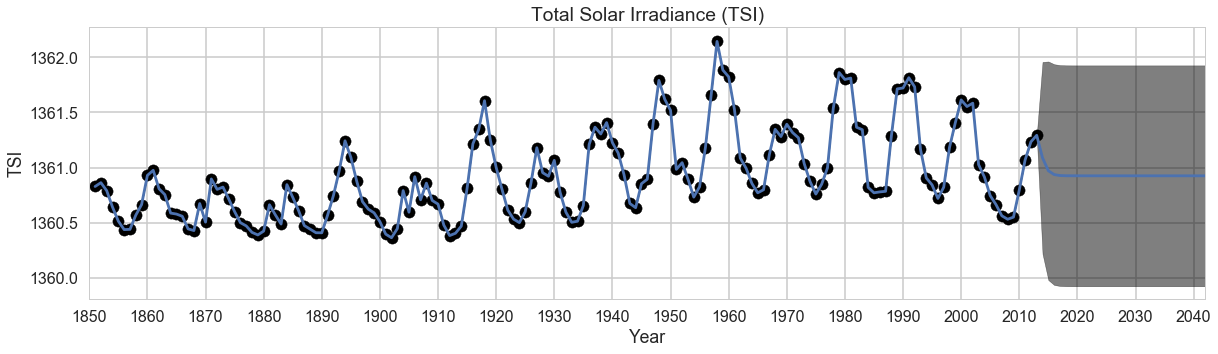

In [2999]:
kernel =   k5


#kernel =   10**2*k5 gives a very different result to kernel = k5

gp = GaussianProcessRegressor(kernel=kernel, alpha=0, optimizer = 'fmin_l_bfgs_b',
                              normalize_y=True)

gp.fit(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]]   )

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

y_pred, y_std = gp.predict(np.array(yearIndex), return_std=True)
y_pred = y_pred[:,0]

plt.figure(figsize=(20,5))
plt.scatter(dataDF[["Year","TSI"]].dropna()[["Year"]], dataDF[["Year","TSI"]].dropna()[["TSI"]], c='k')
plt.plot(yearIndex, y_pred)
plt.fill_between(np.array(yearIndex)[:,0], y_pred - y_std, y_pred + y_std,  alpha=0.5, color='k')
plt.xlim(np.min(yearIndex)-1, np.max(yearIndex))
plt.xticks(np.arange(np.min(yearIndex)-1, np.max(yearIndex), 10))


#plt.grid()
plt.xlabel("Year")
plt.ylabel(r"TSI")
plt.title(r"Total Solar Irradiance (TSI)")
plt.tight_layout
plt.show()

This kernel has no noise term  and as a consequence the model fits the noise and its predictions are therefore very poor.

# Conclusion

The best solutions to the regression problem found by each of SVR and GPR were very similar. GP regression has the significant advantage that it provides confidence intervals with the solution. Morever, the GP approach offers tremendous flexiblity in assumptions about the covariance structure of the data being modelled whereas the SVR approach is much more restrictive in comparison. However, there were some disadvantages to GPR. Tailoring a suitable kernel sometimes seems more of an art than a science, at least for the complex time series modelled here. Solutions that look similiar can have wildly different log marginal likelihoods and similiar log marginal likelihoods can produce very different solutions. Changing the amplitude parameters, and hence the starting points of the gradient descient,  can give very different solutions. All this suggests that there are many local maxima.  Finding the optimal solution using the SVR was in contrast relatively straightforward.  It seems that the landscape in parameter space is highly complex with many local maxima, at least for time series with complex structure and models with a large parameter space. Under these circumstances the suitability of gradient based optimization algorithms for parameter determination is questionable.  It seems natural therefore to attempt to use more powerful methods for the parameter search. As a follow up project I intend, therefore, to explore the use of [Bayesian optimization](https://arxiv.org/pdf/1012.2599.pdf) for this task.

# References 

1. Introduction to Gaussian Processes, David Mackay,
* Gaussian Processes for Machine Learning, Carl Edward Rasmussen and Christopher K. I. Williams, The MIT Press, 2006
* Prediction with Gaussian Processes, C. K. I. Williams
* Pattern Recognition and Machine Learning, Christopher Bishop, 2006.
* A Tutorial on Support Vector Regression, Smola and Scholkopf, 2003.